In [12]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [13]:
train_file = pd.read_csv("./train.csv")
train_file_x = train_file.iloc[0:5000,1:]
train_file_y = train_file.iloc[0:5000,:1]
train_x,test_x,train_y,test_y = train_test_split(train_file_x,train_file_y, train_size = 0.8, random_state=0)

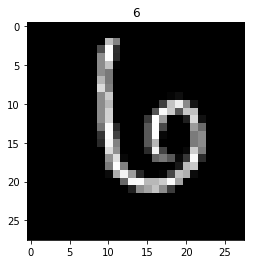

In [14]:
# Viewing an image
i=1
img=train_x.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_y.iloc[i,0])

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

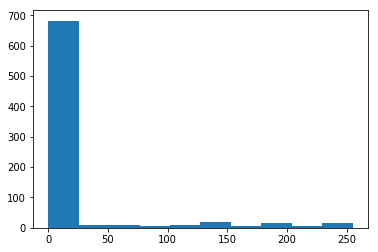

In [15]:
plt.hist(train_x.iloc[i])

In [17]:
# Creating, fitting and Scoring an SVM Model
clf = svm.SVC()
clf.fit(train_x,train_y.values.ravel())
clf.score(test_x,test_y)

0.10000000000000001

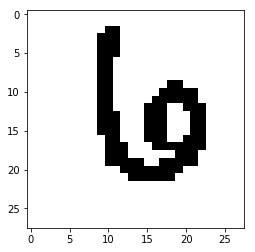

In [22]:
# Converting to black and white images
train_x[train_x > 0] = 1
test_x[test_x > 0] = 1
img = train_x.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img, cmap= 'binary')

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

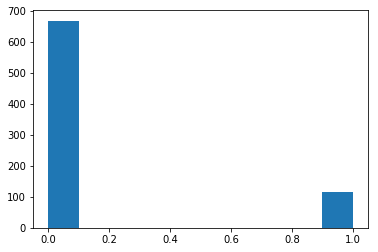

In [24]:
plt.hist(train_x.iloc[i])

In [27]:
clf = svm.SVC()
clf.fit(train_x,train_y.values.ravel())
clf.score(test_x,test_y)

0.88700000000000001

In [31]:
#Reading Test File
test_data = pd.read_csv("./test.csv")
test_data = test_data.iloc[0:5000]
test_data[test_data > 0] = 1
results = clf.predict(test_data)

In [41]:
df = pd.DataFrame(results)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('SVM_results.csv', header=True)